<a href="https://colab.research.google.com/github/ashikshafi08/Fingerprint_restoration_with_MIRNet/blob/main/FingerPrint_with_MIRNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# from google.colab import drive
# drive.mount('/content/drive/')

In [2]:
# Training data 
!wget http://158.109.8.102/Inpainting/Track3/training_input.zip
!wget http://158.109.8.102/Inpainting/Track3/training_ground-truth.zip

--2022-05-15 16:17:52--  http://158.109.8.102/Inpainting/Track3/training_input.zip
Connecting to 158.109.8.102:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2579851470 (2.4G) [application/zip]
Saving to: ‘training_input.zip’

training_input.zip  100%[===================>]   2.40G  23.5MB/s    in 2m 0s   

2022-05-15 16:19:52 (20.6 MB/s) - ‘training_input.zip’ saved [2579851470/2579851470]

--2022-05-15 16:19:52--  http://158.109.8.102/Inpainting/Track3/training_ground-truth.zip
Connecting to 158.109.8.102:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2551253143 (2.4G) [application/zip]
Saving to: ‘training_ground-truth.zip’

training_ground-tru 100%[===================>]   2.38G  8.95MB/s    in 3m 13s  

2022-05-15 16:23:06 (12.6 MB/s) - ‘training_ground-truth.zip’ saved [2551253143/2551253143]



In [ ]:
!unzip '/content/training_ground-truth.zip'
!unzip '/content/training_input.zip'

In [4]:
# Validation set 
!wget http://158.109.8.102/Inpainting/Track3/validation_input.zip
!wget http://158.109.8.102/Inpainting/Track3/validation_ground-truth.zip

--2022-05-15 16:24:28--  http://158.109.8.102/Inpainting/Track3/validation_input.zip
Connecting to 158.109.8.102:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 287411123 (274M) [application/zip]
Saving to: ‘validation_input.zip’

validation_input.zi 100%[===================>] 274.10M  24.4MB/s    in 27s     

2022-05-15 16:24:56 (10.1 MB/s) - ‘validation_input.zip’ saved [287411123/287411123]

--2022-05-15 16:24:56--  http://158.109.8.102/Inpainting/Track3/validation_ground-truth.zip
Connecting to 158.109.8.102:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 284579406 (271M) [application/zip]
Saving to: ‘validation_ground-truth.zip’

validation_ground-t 100%[===================>] 271.40M  21.4MB/s    in 27s     

2022-05-15 16:25:23 (9.89 MB/s) - ‘validation_ground-truth.zip’ saved [284579406/284579406]



In [ ]:
# Unzipping the validation set 
!unzip '/content/validation_ground-truth.zip'
!unzip '/content/validation_input.zip'

In [6]:
# Test set 
# !wget http://158.109.8.102/Inpainting/Track3/test_input.zip
# !wget http://158.109.8.102/Inpainting/Track3/test_ground-truth.zip

In [37]:
# Data paths 

train_input_path = '/content/drive/MyDrive/Final_year_project/train/training_input/'
train_ground_path = '/content/drive/MyDrive/Final_year_project/train/training_ground-truth/'

val_input_path = '/content/drive/MyDrive/Final_year_project/val/validation_input/'
val_ground_path = '/content/drive/MyDrive/Final_year_project/val/validation_ground-truth/'

In [38]:
inp_path = '/content/training_ground-truth'
ground_truth_path = '/content/training_ground-truth'

In [39]:
# How many images in there? 

import os 

print(f'There are {len(os.listdir(inp_path))} training input images')
print(f'There are {len(os.listdir(ground_truth_path))} training ground truth images')

#print(f'There are {len(os.listdir(val_input_path))} validation input images')
#print(f'There are {len(os.listdir(val_ground_path))} validation ground truth images')

There are 75600 training input images
There are 75600 training ground truth images


In [40]:
import os
import random 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
import tensorflow as tf


In [41]:
train_input_fns = sorted(os.listdir(inp_path))
train_ground_fns = sorted(os.listdir(ground_truth_path))

val_input_fns = sorted(os.listdir('/content/validation_input/'))
val_ground_fns = sorted(os.listdir('/content/validation_ground-truth/'))
train_input_fns[:10] , train_ground_fns[:10]

(['1.jpg',
  '10.jpg',
  '100.jpg',
  '1000.jpg',
  '10000.jpg',
  '10001.jpg',
  '10002.jpg',
  '10003.jpg',
  '10004.jpg',
  '10005.jpg'],
 ['1.jpg',
  '10.jpg',
  '100.jpg',
  '1000.jpg',
  '10000.jpg',
  '10001.jpg',
  '10002.jpg',
  '10003.jpg',
  '10004.jpg',
  '10005.jpg'])

In [42]:
# How many images in training set? 
len(train_input_fns) , len(train_ground_fns)

(75600, 75600)

In [43]:
# How many images are in the validation set? 
len(val_input_fns) , len(val_ground_fns)

(8400, 8400)

In [44]:
# Specifying the paths 
training_input_path = '/content/training_input/'
training_ground_truth_path = '/content/training_ground-truth/'

val_input_path = '/content/validation_input/'
val_ground_truth_path = '/content/validation_ground-truth/'

Plot 3x3 matrix of pictures of the ground truth vs noisy finger prints. 

- Dynamic creation of path lists based on the arguments. 
- Rather the filenames, pick random indexes. For train the index len will be different than that of a val. 

In [45]:
val_idxs = np.arange(len(os.listdir(val_input_path)))
val_idxs[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [46]:
# def make_plots(set = 'train'):

#   if set:
#     trainInputPaths = sorted(glob.glob(os.path.join(training_input_path , '*.jpg')))
#     trainGroundPaths = sorted(glob.glob(os.path.join(training_ground_truth_path , '*.jpg')))

#     trainIdxs = np.arange(len(trainInputPaths))

#     for i in range(2):
      
#       plt.figure(figsize = (15 , 7))
#       #ax = plt.subplot(3 , 3 , i+ 1)
#       plt.title('Fingerprints with noise and')
#       randomIdx = random.choice(trainIdxs)
#       img = mpimg.imread(trainInputPaths[randomIdx])

#       trueImg = mpimg.imread(trainGroundPaths[randomIdx])
#       plt.title('Respective Ground truth of the above Fingerprints')
#       plt.imshow(img)
#       plt.axis('off')
  
      
      
      


#   else:
#     valInputPaths = sorted(glob.glob(os.path.join(val_input_path , '*.jpg')))
#     valGroundPaths = sorted(glob.glob(os.path.join(val_ground_path , '*.jpg')))

#     valIdxs = np.arange(len(valInputPaths))


In [47]:
# Getting the file names as paths 
import glob 

trainInputPaths = sorted(glob.glob(os.path.join(training_input_path , '*.jpg')))
trainGroundPaths = sorted(glob.glob(os.path.join(training_ground_truth_path , '*.jpg')))

valInputPaths = sorted(glob.glob(os.path.join(val_input_path , '*.jpg')))
valGroundPaths = sorted(glob.glob(os.path.join(val_ground_path , '*.jpg')))


In [48]:
listds = tf.data.Dataset.list_files(trainInputPaths)

for sample in listds.take(5):
  print(sample.numpy())

b'/content/training_input/43835.jpg'
b'/content/training_input/42476.jpg'
b'/content/training_input/74374.jpg'
b'/content/training_input/38386.jpg'
b'/content/training_input/18425.jpg'


In [49]:
# Function to decode jpeg or jpg from a file path 
def decode_image(path):
  img = tf.io.read_file(path)
  img = tf.io.decode_jpeg(img , channels = 3)
  img = tf.image.resize(img , [224 , 224])
  return img

In [50]:
decode_image(trainInputPaths[48])

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[187.57143, 187.57143, 187.57143],
        [187.6446 , 187.6446 , 187.6446 ],
        [187.78572, 187.78572, 187.78572],
        ...,
        [187.46758, 187.46758, 187.46758],
        [187.     , 187.     , 187.     ],
        [187.     , 187.     , 187.     ]],

       [[191.029  , 191.029  , 191.029  ],
        [190.14285, 190.14285, 190.14285],
        [189.57365, 189.57365, 189.57365],
        ...,
        [191.12685, 191.12685, 191.12685],
        [188.32143, 188.32143, 188.32143],
        [188.32143, 188.32143, 188.32143]],

       [[198.10307, 198.10307, 198.10307],
        [198.40076, 198.40076, 198.40076],
        [199.01538, 199.01538, 199.01538],
        ...,
        [198.1692 , 198.1692 , 198.1692 ],
        [197.07143, 197.07143, 197.07143],
        [197.07143, 197.07143, 197.07143]],

       ...,

       [[158.42828, 158.42828, 158.42828],
        [211.10045, 211.10045, 211.10045],
        [183.17844, 183.178

### Things to do: 

- Create a tf data dataset for train and validation set, 

    ```
    tf.data.Dataset.from_tensor_slices((ground_truth , input_image))
    ```
- Train a simple Unet model and use it as a basline. 
- Visualize the dataset, write a function to plot the ground truth vs noisy images par to par. 
- Finite and create a more robust perfomant dataset, with prefetching, cache's etc. 

In [51]:
# Function to read the image from the path 

def read_image(image_path):

  '''
  image_path : path of the image 

  '''

  image = tf.io.read_file(image_path) # read the path 
  image = tf.image.decode_jpeg(image , channels = 3) # decode into jpeg  
  image = tf.image.resize(image , [224 , 224]) # resize the image 
  return image  




In [52]:
# Specifying the paths 
import glob

training_input_path = '/content/training_input/'
training_ground_truth_path = '/content/training_ground-truth/'

val_input_path = '/content/validation_input/'
val_ground_truth_path = '/content/validation_ground-truth'

trainInputPaths = sorted(glob.glob(os.path.join(training_input_path , '*.jpg')))
trainGroundPaths = sorted(glob.glob(os.path.join(training_ground_truth_path , '*.jpg')))


valInputPaths = sorted(glob.glob(os.path.join(val_input_path , '*.jpg')))
valGroundPaths = sorted(glob.glob(os.path.join(val_ground_truth_path , '*.jpg')))

len(valGroundPaths) , len(valInputPaths)

(8400, 8400)

In [53]:
# Setting up the parameters 
IMAGE_SIZE = 224 
BATCH_SIZE = 16 
MAX_TRAIN_IMAGES = 400 

In [54]:
# Function to random crop the images 


def random_crop(noise_image , truth_image):

  noise_image_shape = tf.shape(noise_image)[:2] # width and height of the image 

  noise_width = tf.random.uniform(
      shape = () , maxval = noise_image_shape[1] - IMAGE_SIZE + 1 , dtype = tf.int32
  )

  noise_height = tf.random.uniform(
      shape = () , maxval = noise_image_shape[0] - IMAGE_SIZE + 1 , dtype = tf.int32 
  )

  truth_width = noise_width 
  truth_height = noise_height 

  # Define the cropping area 
  noise_image_cropped = noise_image[
                                    noise_height:noise_height + IMAGE_SIZE , 
                                    noise_width:noise_width + IMAGE_SIZE
                                    ]
  truth_image_cropped = truth_image[
                                    truth_height: truth_height + IMAGE_SIZE , 
                                    truth_width:truth_width + IMAGE_SIZE
  ]

  return noise_image_cropped , truth_image_cropped

In [55]:
# Random crop function from the tensorflow 

def tf_random_crop(image):
  cropped_image = tf.image.random_crop(
      image, size=[224, 224, 3])

  return cropped_image

In [56]:
# Function to load the data and apply the transforms 

def load_data(noise_image_path , truth_image_path):

  noise_image = read_image(noise_image_path)
  truth_image = read_image(truth_image_path)

  cropped_noise_image = tf_random_crop(noise_image)
  cropped_truth_image = tf_random_crop(truth_image)

  return cropped_noise_image , cropped_truth_image

In [57]:
# Passing in sample data inside 

sample_noise_image , sample_truth_image = load_data(trainInputPaths[3] , trainGroundPaths[3])

In [58]:
sample_noise_image.shape , sample_truth_image.shape

(TensorShape([224, 224, 3]), TensorShape([224, 224, 3]))

(-0.5, 223.5, 223.5, -0.5)

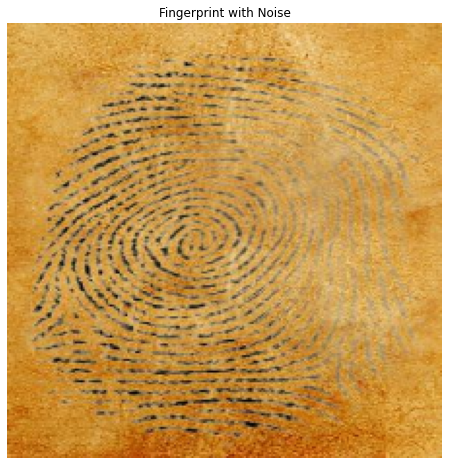

In [59]:
# Visualiizng the finger print filled with noise 
plt.figure(figsize = (12 ,8))
plt.title('Fingerprint with Noise')
plt.imshow(sample_noise_image.numpy().astype('uint8'));
plt.axis('off')

(-0.5, 223.5, 223.5, -0.5)

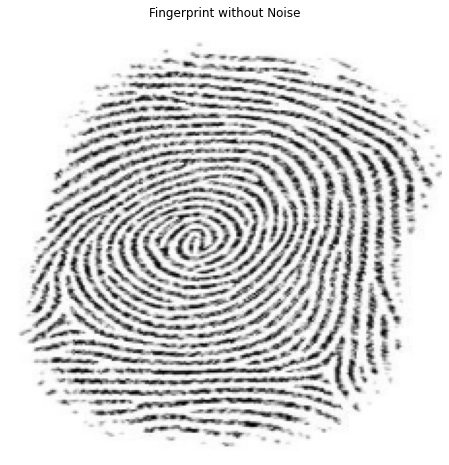

In [60]:
# Visualiizng the finger print filled with noise 
plt.figure(figsize = (12 ,8))
plt.title('Fingerprint without Noise')
plt.imshow(sample_truth_image.numpy().astype('uint8'));
plt.axis('off')


In [61]:
# Function to make the tf.data.Dataset 

def get_dataset(noise_image_paths , truth_image_paths):

  dataset = tf.data.Dataset.from_tensor_slices((noise_image_paths , truth_image_paths))

  # Need to apply the transforms 
  dataset = dataset.map(load_data , num_parallel_calls = tf.data.AUTOTUNE)
  dataset = dataset.batch(BATCH_SIZE , drop_remainder= True).cache().prefetch(tf.data.AUTOTUNE)
  
  return dataset


In [63]:
# Creating the dataset 
from tensorflow.keras import layers 

train_dataset = get_dataset(trainInputPaths , trainGroundPaths)
val_dataset = get_dataset(valInputPaths , valGroundPaths)

print(f'Train Dataset --> {train_dataset}')
print('\n')
print(f'Val Dataset --> {val_dataset}')

Train Dataset --> <PrefetchDataset element_spec=(TensorSpec(shape=(16, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(16, 224, 224, 3), dtype=tf.float32, name=None))>


Val Dataset --> <PrefetchDataset element_spec=(TensorSpec(shape=(16, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(16, 224, 224, 3), dtype=tf.float32, name=None))>


## Modelling 

Here we will be building three important blocks for this MIRNet Architecture, the main features of this architecture are: 

- Feature Extraction model that computes a complementary set of features across multiple spatial scales, while preserving high resolution features for spatial details. 
- A mechanism for information exchange, where the features across multi-resolution branches are progressively fused together to improve representation learning. 
- A new approach to fuse multi-scale fields and preserves the original feature informaton at each spatial resolution. 
- A recursive residual design that breaks down the input signal in order to simplify the overall learning process, and enables to construct very deep networks. 

#### Selective Kernel Feature Fusion (SKFF) 

Takes in three multi-scale features and returns back the aggregated feature. 

As we know the SKFF combines and performs aggregation based on the self attention mechanism. 

The SKFF responsible for the dynamic adjustment of the receptive field. 

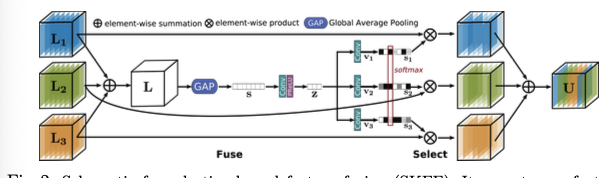

In [70]:
def selective_kernel_feature_fusion(multi_scale_feature_1 , 
                                    multi_scale_feature_2 , multi_scale_feature_3):
  

  '''
  Performs multi-scale aggregation of the features
  '''

  ##### Fuse Operator ######
  ##########################

  # Shape of the multi-scale shape == number of channels
  channels = list(multi_scale_feature_1.shape)[-1]

  # Combining the feature by element wise summation 
  # L = L1 + L2 + L3
  combined_features = layers.Add()([multi_scale_feature_1 , multi_scale_feature_2 , multi_scale_feature_3])
                                  

  # Passing the L to the global averale pooling and compute across spatial dimension (HxW)
  gap = layers.GlobalAveragePooling2D()(combined_features)

  # Channel-wise statistics (s) [1x1xC] 
  channel_wise_stats = tf.reshape(gap , shape = (-1 , 1 , 1 , channels))

  # Channel downscaling cnn to generate compact feature representation 
  # r = C / 8 
  compact_feature_representation = layers.CNN(filters = channels // 8 , kernel_size = (1 , 1 ) )(channel_wise_stats)

  # Applying the PRelu for the above 
  pRelu = layers.PReLU()(compact_feature_representation)


  ##### Select Operator ######
  ############################ 

  # Here we parse out each feature descriptors and apply softmax to them 
  feature_descriptor_1 = layers.Conv2D(
      filters = channels , kernel_size = (1,1) , activation = 'softmax'
  )(pRelu)
  feature_descriptor_2 = layers.Conv2D(
      filters = channels , kernel_size = (1 ,1) , activation = 'softmax'
  )(pRelu)
  feature_descriptor_3 = layers.Conv2D(
      channels , kernel_size = (1 , 1) , activation = 'softmax'
  )(pRelu)

  # Now we get the features by rescaling it 
  # input tensor * feature descriptor 
  feature_1 = multi_scale_feature_1 * feature_descriptor_1
  feature_2 = multi_scale_feature_2 * feature_descriptor_2
  feature_3 = multi_scale_feature_3 * feature_descriptor_3

  # U = L1*s1 + s2*L2 + s3*L3
  # This is the overall process of feature recali and aggregation 
  aggregated_feature = layers.Add()([feature_1 , feature_2 , feature_3])

  return aggregated_feature

  

#### Dual Attention Unit 

Sharing of features is important for the attention mechanism, since they activate the sharing the architecture were able to dynamically allocate the receptive fields and gives better results. 

The SKFF enables the aggregation of the features, the DAU is a mechanism that helps in sharing the information with a feature both along the spatial and channel dimensions. 

The DAU has two blocks, 
- Channel Attention 
- Spatial Attention 

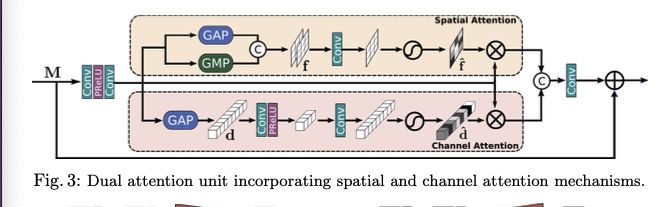

In [67]:
# Lets build a function for the spatial attention block 

def spatial_attention_block(input_tensor):

  average_pooling = tf.reduce_mean(input_tensor  , axis = -1)
  average_pooling = tf.expand_dims(average_pooling , axis = -1)

  max_pooling = tf.reduce_max(input_tensor , axis = -1)
  max_pooling = tf.expand_dims(max_pooling , axis = -1)

  # Performing the C 
  # Concatenate by the last axis
  concatenation = layers.Concatenate(axis = -1)([average_pooling , max_pooling])

  # Passing the feature map [HXWx2] into a CNN
  feature_map = layers.Conv2D(1 , kernel_size = (1 ,1 ))(concatenation)

  # Appling sigmoid function to the feature map 
  feature_map = tf.nn.sigmoid(feature_map)
  return input_tensor * feature_map

In [68]:
# Function for the channel attention block 

def channel_attention_block(input_tensor):

  channels = list(input_tensor.shape)[-1]

  # Applying the GAP 
  average_pooling = layers.GlobalAveragePooling2D()(input_tensor)

  # Reshaping of shape (1x1xC) for the feature descriptor 
  feature_descriptor = tf.reshape(average_pooling , shape = (-1 , 1 , 1, channels))

  feature_activations = layers.Conv2D(
      filters = channels // 8 , kernel_size = (1 , 1) 
  )

  pRelu = layers.PReLU()(feature_activations)

  sigFeature_activations = layers.Conv2D(channels , kernel_size = (1 ,1 ) , activation = 'sigmoid')(PRelu)

  # Rescaling the features 
  return input_tensor * sigFeature_activations

In [69]:
# Constructing the Dual Attention Block 

def dual_attention_unit_block(input_tensor):

  channels = list(input_tensor.shape)[-1]

  feature_map = layers.Conv2D(channels , kernel_size = (3,3) , padding = 'same')(input_tensor)
  feature_map = layers.PReLU()(feature_map)
  
  feature_map = layers.Conv2D(channels , kernel_size = (3 ,3) , padding = 'same')(feature_map)

  # Configuring the channel attention and spatial attention 
  channel_attention = channel_attention_block(feature_map)
  spatial_attention = spatial_attention_block(feature_map)

  # Performing the concat where we will combine both the attention maps 
  concat = layers.Concatenate(axis = -1)([channel_attention , spatial_attention])
  
  # Applying a final Conv layer 
  concat = layers.Conv2D(channels , kernel_size = (1 , 1))(concat)

  # Rescaling the output with the input tensor 
  rescaleFeature = layers.Add()([input_tensor , concat])

### Multi-Scale Residual Block 

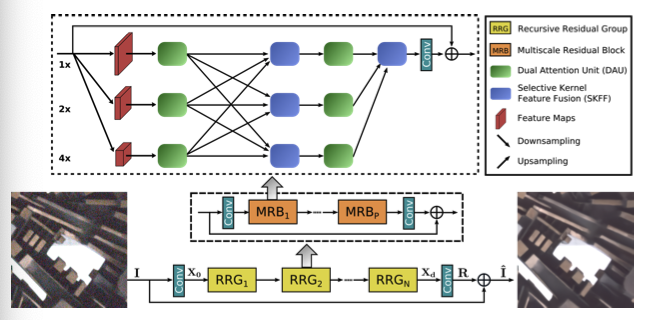

#### Recursive Residual Modules 


Each RRGs contains `P` number of MRBs in it. 

The recursive residual modules eases the flow of feature information during the learning process. Here they proposed a residual way of downsampling and upsampling of the features. 

Here we will construct the residual resizing downsample and upsampling modules.


**Tidbits**
- For the Downsample, the skip connection part is H/2 x W/2 x 2C. So the filters of those Conv2D will be 2 * channels, and likewise the same for the upsampling where the form is of 2H x 2W x C / 2, so we divide the channels by 2 to get the desired filters.

In [76]:
# Downsampling module

def downsample_module(input_tensor):

  # color channels 
  channels = list(input_tensor.shape)[-1]

  # First Conv + PReLU combo 
  main_branch = layers.Conv2D(channels , kernel_size = (1 , 1))
  main_branch = layers.PReLU()(main_branch)

  # Conv2D 3 kernel and PRelu 
  main_branch = layers.Conv2D(channels , kernel_size = (3 ,3), padding = 'same')(main_branch)
  main_branch = layers.PReLU()(main_branch)

  # Antialiasing down sampling is nothing but a maxpooling 
  main_branch = layers.MaxPooling2D()(main_branch)


  #### Performing 2x downsampling ####
  ####################################

  # Conv2D 1 kernel 
  main_branch = layers.Conv2D(channels * 2 , kernel_size = (1, 1))(main_branch)


  ## Skip Connection 

  # Another Anti aliasing and Conv2D downsample (skip branch)
  skip_branch = layers.MaxPooling2D()(input_tensor)
  skip_branch = layers.Conv2D(channels * 2 , kernel_size = (1 ,1))(skip_branch)

  skip_connection = layers.Add()([skip_branch , main_branch])

  return skip_connection


# Upsampling module 

def upsampling_module(input_tensor):

  channels = list(input_tensor.shape)[-1]

  main_branch = layers.Conv2D(channels  , kernel_size = (1, 1))(input_tensor)
  main_branch = layers.PReLU()(main_branch)

  main_branch = layers.Conv2D(channels , kernel_size = (3 ,3), padding ='same')(main_branch)
  main_branch = layers.PReLU()(main_branch)

  # Performing the Bilinear Upsampling and passing into a Conv2D layer
  main_branch = layers.UpSampling2D()(main_branch)
  main_branch = layers.Conv2D(channels // 2 , kernel_size = (1 ,1))(main_branch)

  #### Skip Conection #### 

  skip_branch = layers.UpSampling2D()(input_tensor)
  skip_branch = layers.Conv2D(channels // 2 , kernel_size = (1, 1))(skip_branch)

  skip_connection = layers.Add()([skip_branch , main_branch])
  return skip_connection



We are the quite near end of building the entire architecture, now we are designing the MRB block and seem to be considered as the important building block of this MIRNet. 

MRB block usually has all the blocks packed inside of em. Below is what one MRB block will potentially look like, 

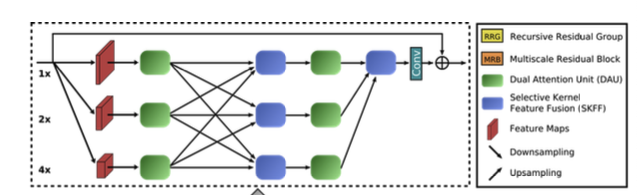

**How MIR Block is constructed** (in rough words dude)

- for the level 1, we get the input tensor. 
- for the level 2, we downsample the input tensor for 2X. So our default downsampling is 2X, then it should be one instance. 
- for the level 3, here the downsampling is 4x here we will pass the level 2 into the downsample module again so it will be 4x overall (smart). 

Here comes the DAU into action, after getting the level 1-3 features maps we will pass them into the DAU blocks each one by one.
- level 1 feature map passe into the dau block and we do this for feature maps till level 3. 

After the DAU we need to pass these features into a SKFF blocks. 

